In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
column_names = ["variance","skewness","kurtosis","entropy","class"]
# Loading dataset
data = pd.read_csv("data_banknote_authentication.txt", header=None,names=column_names)

print(data.head())


   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
# Dataset shape
print("Dataset Shape:", data.shape)

# Checking missing values
print("\nMissing Values:\n", data.isnull().sum())

# Data types
print("\nData Types:\n", data.dtypes)


Dataset Shape: (1372, 5)

Missing Values:
 variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

Data Types:
 variance    float64
skewness    float64
kurtosis    float64
entropy     float64
class         int64
dtype: object


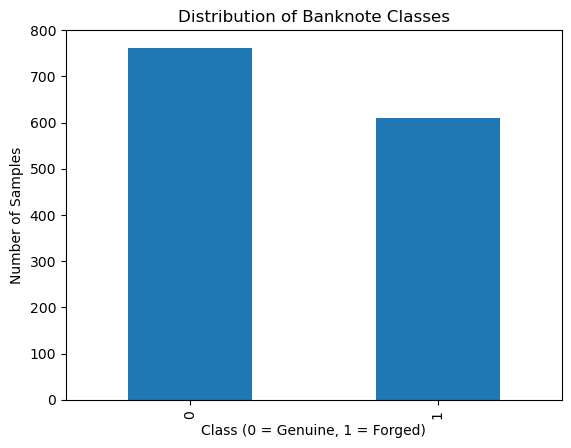

In [4]:
# Class distribution
data['class'].value_counts().plot(kind='bar')
plt.xlabel("Class (0 = Genuine, 1 = Forged)")
plt.ylabel("Number of Samples")
plt.title("Distribution of Banknote Classes")
plt.show()


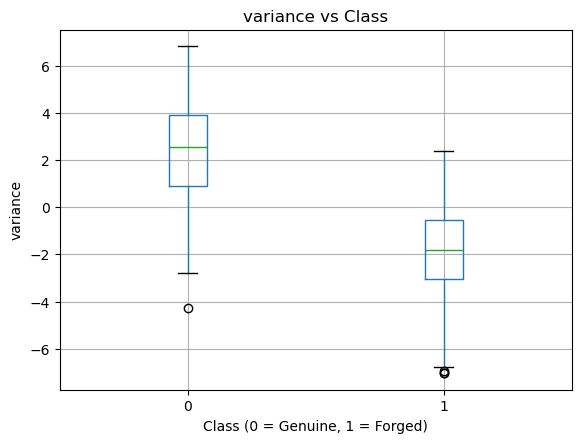

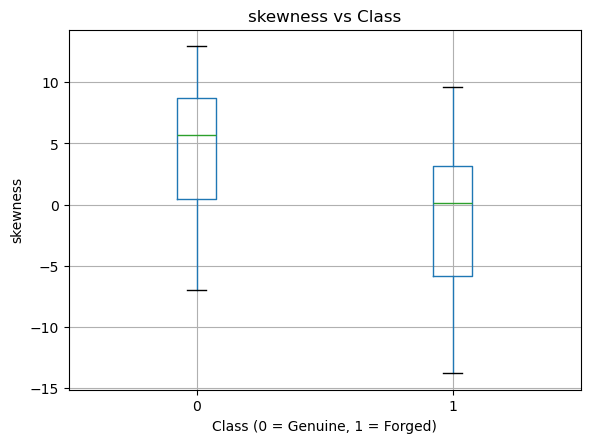

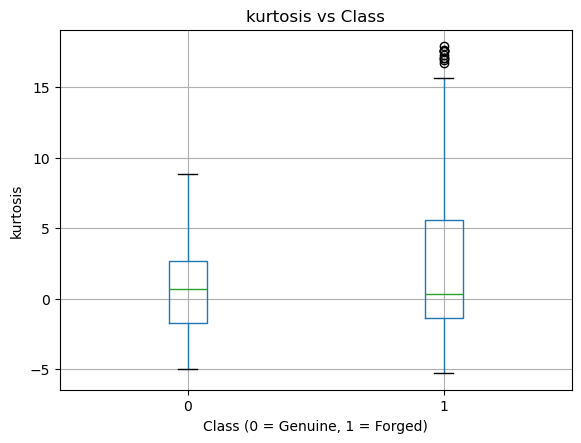

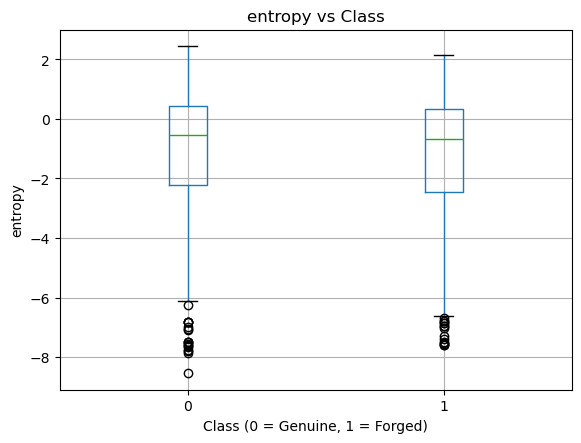

In [5]:
# Boxplots for features vs class
for feature in ["variance", "skewness", "kurtosis", "entropy"]:
    data.boxplot(column=feature, by="class")
    plt.title(f"{feature} vs Class")
    plt.suptitle("")
    plt.xlabel("Class (0 = Genuine, 1 = Forged)")
    plt.ylabel(feature)
    plt.show()


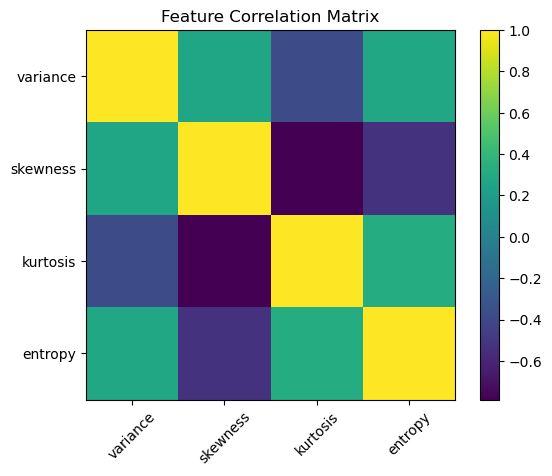

In [6]:
# Correlation matrix
corr = data.drop("class", axis=1).corr()

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.show()


In [7]:
# Separating features and target
X = data.drop("class", axis=1)
y = data["class"]


In [8]:
X.head()

,variance,skewness,kurtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [10]:
X.columns

Index(['variance', 'skewness', 'kurtosis', 'entropy'], dtype='object')

In [11]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_reg = LogisticRegression(max_iter=3000)

In [15]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=3000)

In [16]:
y_pred_lr = log_reg.predict(X_test_scaled)

In [17]:
# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

Logistic Regression Accuracy: 97.82%


In [18]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[144   4]
 [  2 125]]


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Random Forest with OOB Score
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [22]:
# Predictions and Accuracy
y_pred_rf = rf.predict(X_test)

In [23]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))


Random Forest Accuracy: 98.91%


In [24]:
# OOB Score
oob_score = rf.oob_score_
print(f"OOB Score: {oob_score * 100:.2f}%")

OOB Score: 99.00%


In [25]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [26]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Confusion Matrix:
[[147   1]
 [  2 125]]


In [27]:
import pandas as pd

feature_importance = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
variance    0.569921
skewness    0.222666
kurtosis    0.153825
entropy     0.053588
dtype: float64


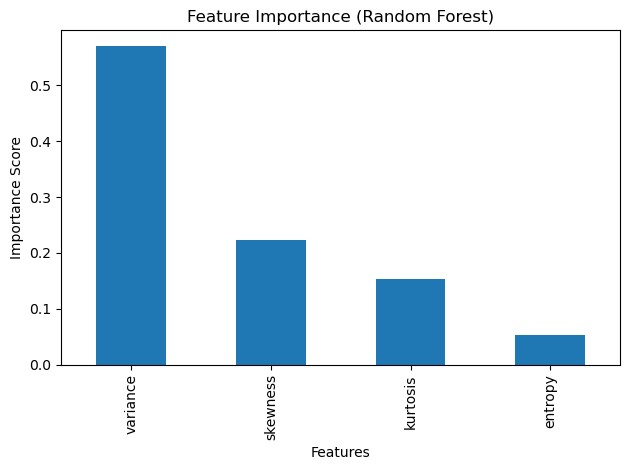

In [28]:
import matplotlib.pyplot as plt

feature_importance.plot(kind='bar',title="Feature Importance (Random Forest)")

plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


# K Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=25)

In [31]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [32]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

KNN Accuracy: 99.27%


In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.98      1.00      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [34]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Confusion Matrix:
[[146   2]
 [  0 127]]


# Ensemble method

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
ensemble_model = VotingClassifier(
   estimators=[
        ("Logistic_Regression", LogisticRegression()),
       ("Random_Forest", RandomForestClassifier()),
        ("KNN", KNeighborsClassifier()),
    ],
    voting='hard'  
)


In [37]:
ensemble_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Random_Forest', RandomForestClassifier()),
                             ('KNN', KNeighborsClassifier())])

In [38]:
y_pred_en = ensemble_model.predict(X_test_scaled)

In [39]:
ensemble_accuracy = accuracy_score(y_test, y_pred_en)
print("Ensemble Accuracy: {:.2f}%".format(ensemble_accuracy * 100))

Ensemble Accuracy: 100.00%


In [40]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_en))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [41]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_en))


Confusion Matrix:
[[148   0]
 [  0 127]]


# Accuracy Comparison

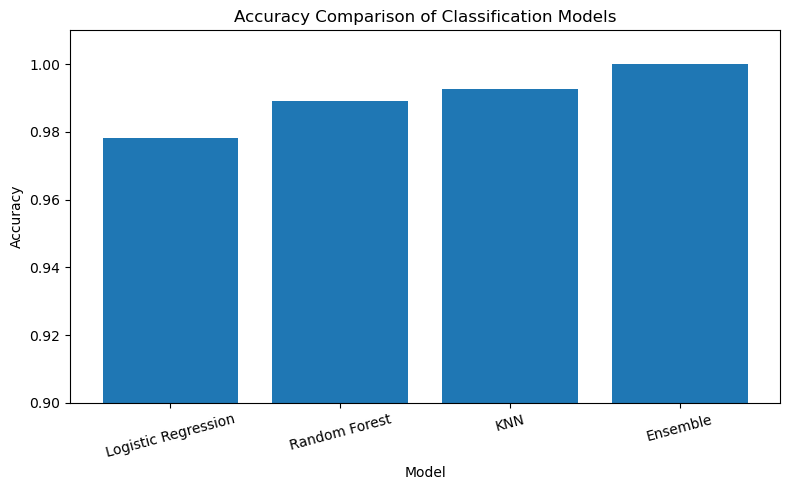

In [42]:
results = {
    "Logistic Regression": lr_accuracy,
    "Random Forest": rf_accuracy,
    "KNN": knn_accuracy,
    "Ensemble": ensemble_accuracy
}

models = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.ylim(0.9, 1.01)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Accuracy Comparison of Classification Models")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
